# Performing a Time Series Analysis

## Table of Contents
* [01. Importing Libraries and Data](#01.-Importing-Libraries-and-Data)
* [02. Viewing Data](#02.-Viewing-Data)
* [03. Plotting Entirety of Data](#03.-Plotting-Entirety-of-Data)
* [04. Separating Components of Data](#04.-Separating-Components-of-Data)
* [05. Dickey Fuller Test](#05.-Dickey-Fuller-Test)
* [06. Checking for Autocorrelations](#06.-Checking-for-Autocorrelations)
* [07. Differencing](#07.-Diffferencing)
* [08. Dickey Fuller Test](#08.-Dickey-Fuller-Test)
* [09. Checking for Autocorrelations](#09.-Checking-for-Autocorrelations)
* [10. Exporting Data Frame](#10.-Exporting-Data-Frame)

# 01. Importing Libraries and Data

In [1]:
# Importing libraries 
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os

In [2]:
# Disregarding warnings 
import warnings 
warnings.filterwarnings("ignore") 

In [3]:
# Styling option
plt.style.use('fivethirtyeight') 

In [4]:
# Importing Consumer Price Index file
df_cpi = pd.read_csv(r'/Users/suzandiab/Documents/Cost of Living/02 Data/Original Data/CPIMONTHLY.csv',
                 index_col = False)

# 02. Viewing Data

In [5]:
# Previewing data
df_cpi.head()

,DATE,USACPALTT01CTGYM
0,2010-01-01,-0.160617
1,2010-02-01,-0.120399
2,2010-03-01,-0.054216
3,2010-04-01,-0.001069
4,2010-05-01,0.026482


In [6]:
# Dimensions
df_cpi.shape

(168, 2)

In [7]:
# Renaming value column
df_cpi.rename(columns={'USACPALTT01CTGYM': 'consumer_price_index'}, inplace=True)

In [8]:
# Renaming DATE column 
df_cpi.rename(columns={'DATE': 'date'}, inplace=True)

In [9]:
# Checking columns
df_cpi.columns

Index(['date', 'consumer_price_index'], dtype='object')

# 03. Setting Index Column

In [10]:
# Setting date as the index
df_cpi.set_index('date', inplace=True)

In [11]:
# Previewing data
df_cpi.head()

,consumer_price_index
date,
2010-01-01,-0.160617
2010-02-01,-0.120399
2010-03-01,-0.054216
2010-04-01,-0.001069
2010-05-01,0.026482


In [12]:
# Set index to datetime
df_cpi.index = pd.to_datetime(df_cpi.index)

# 03. Plotting Entirety of Data

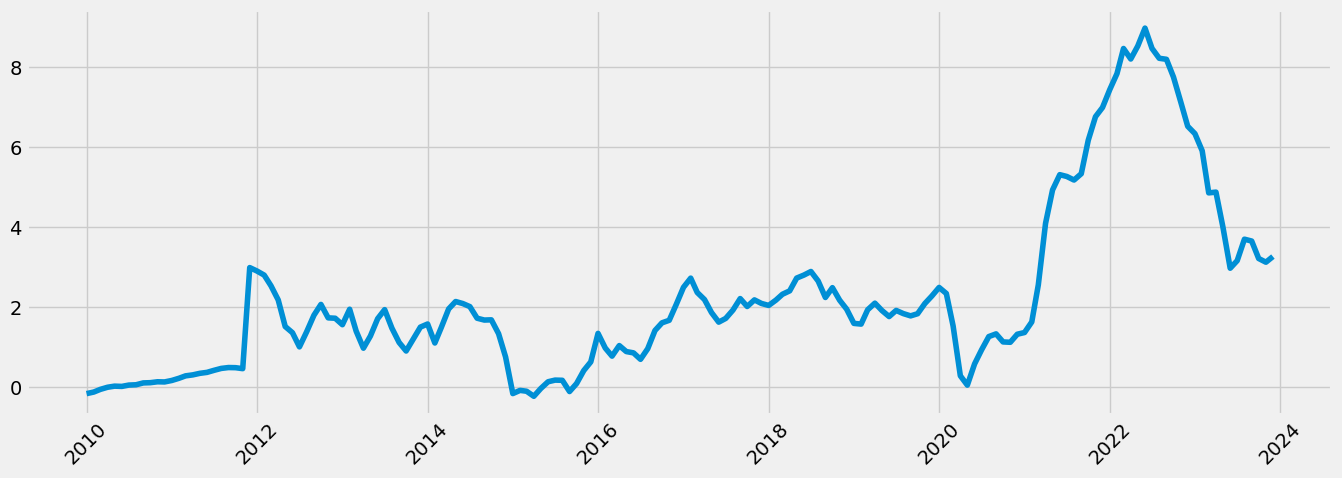

In [13]:
# Plot the data using matplotlib.

bar1 = plt.figure(figsize=(15,5))

plt.plot(df_cpi)
plt.xticks(rotation=45)
plt.show()

Don't need to create a subset. Data from 2010-2023 is reasonable.

In [14]:
# Ecport chart 
bar1.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/timeseries.png', bbox_inches='tight')

In [15]:
# Check for missing values
df_cpi.isnull().sum()

consumer_price_index    0
dtype: int64

In [16]:
# Check for duplicates
dups = df_cpi.duplicated()
dups.sum()

0

In [17]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_cpi, model='additive')

In [18]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

# 04. Separating Components of Data

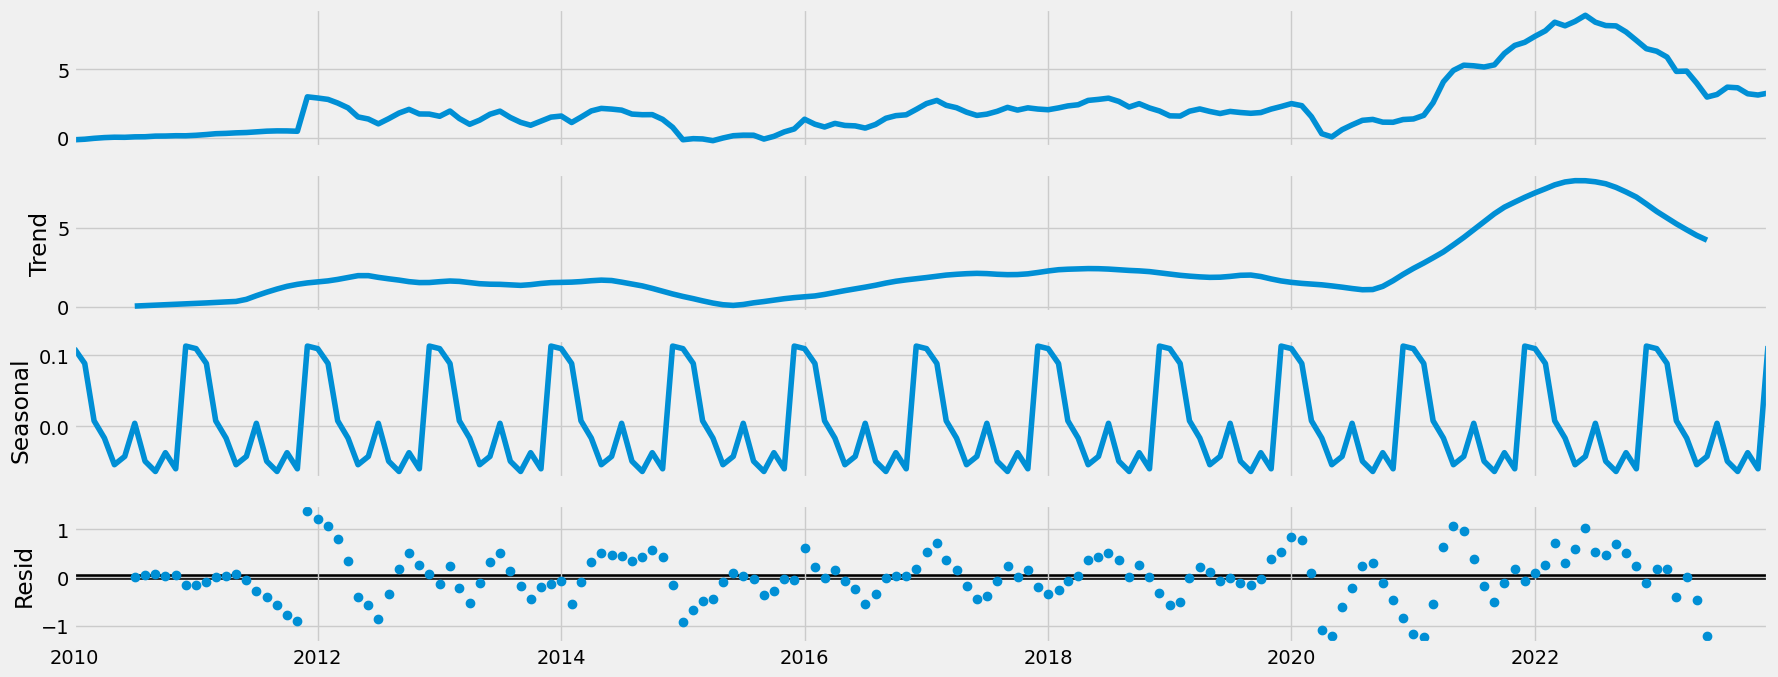

In [19]:
# Plot the separate components

decomposition.plot()
plt.show()

The level and trend differ because the data is unsmoothed and has a lot of noise.

Trend is pretty constant except for an increase between 2020 and 2023 before decreasing. Items got more expensive during covid due to scarcity and lack of production.

There is seasonality as shown by the spikey points.

There is a bunch of unexplained noise as shown in the resid.

# 05. Dickey Fuller Test

In [20]:
# Performing Dickey-Fuller test 

from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): 
   
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(df_cpi['consumer_price_index'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.935335
p-value                          0.315625
Number of Lags Used              1.000000
Number of Observations Used    166.000000
Critical Value (1%)             -3.470370
Critical Value (5%)             -2.879114
Critical Value (10%)            -2.576139
dtype: float64


The test statistic is larger than critical value (5%) so we failed to reject the null hypothesis.

The null hypothesis is that there is a unit root which means the data would be stationary.

So, because we failed to reject the null hypothesis, there is the presence of a unit root which means the data is unstationary and we can not proceed with a forecast. 

# 06. Checking for Autocorrelations

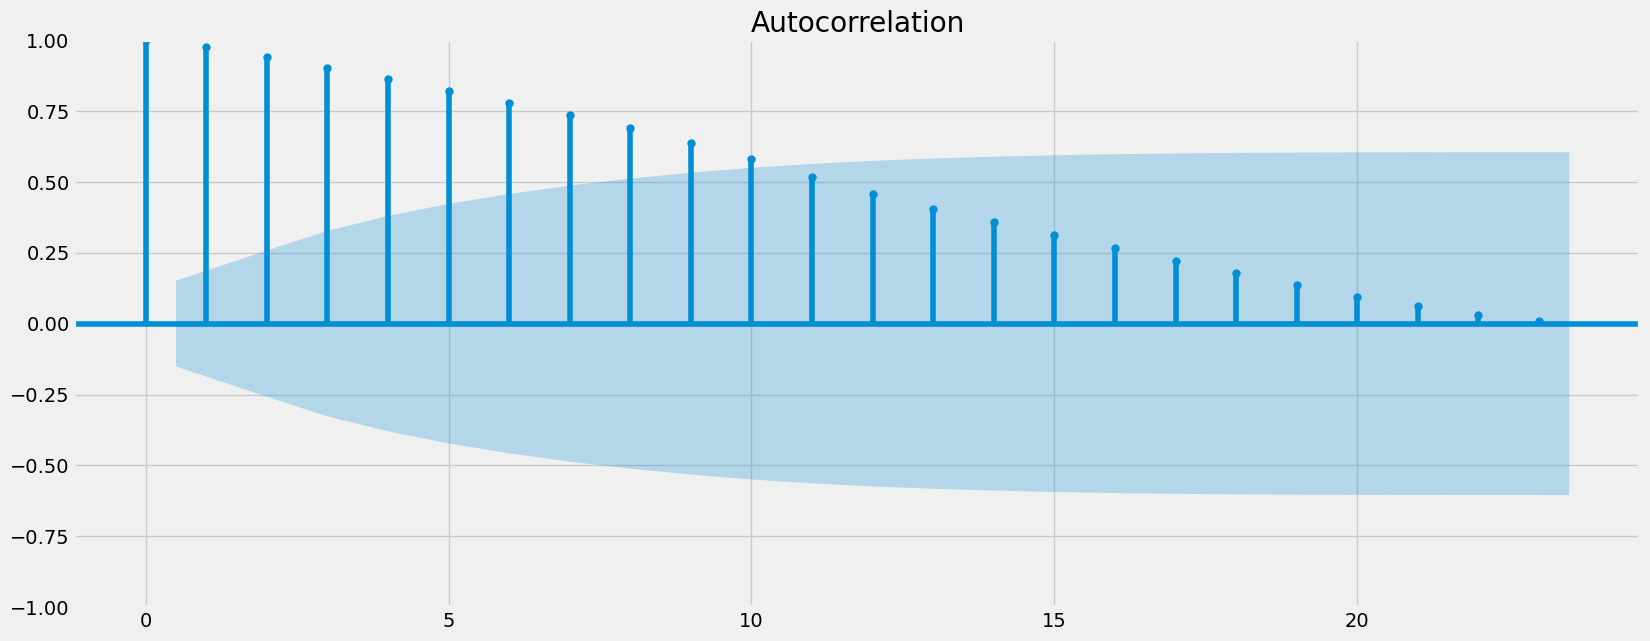

In [21]:
# Check autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_cpi)
plt.show()

There are a considerable amount of lags that go above the blue edge of the confidence interval. So, there are many lags that are correlated with each other which declares this data unstationary.

# 07. Differencing

In [22]:
# Calculating difference
df_diff = df_cpi - df_cpi.shift(1) 

In [23]:
# Removing missing values that were produced from differencing
df_diff.dropna(inplace = True) 

In [24]:
# Previewing data
df_diff.head()

,consumer_price_index
date,
2010-02-01,0.040218
2010-03-01,0.066182
2010-04-01,0.053147
2010-05-01,0.027551
2010-06-01,-0.006444


In [25]:
# Checking columns
df_diff.columns

Index(['consumer_price_index'], dtype='object')

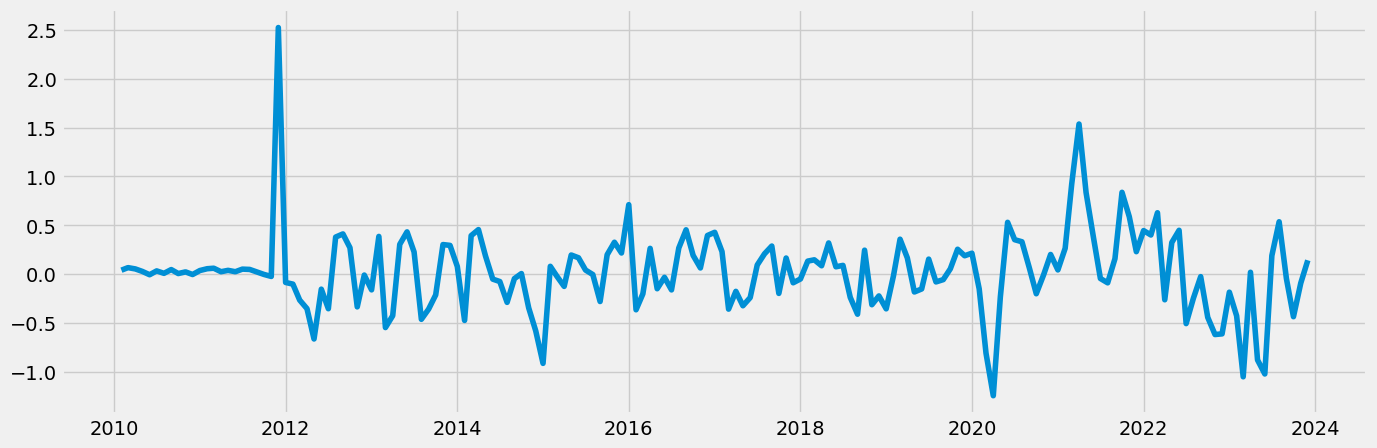

In [26]:
# Plot time series and see the difference

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

# 08. Dickey Fuller Test 

In [27]:
# Performing test
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -8.919108e+00
p-value                        1.052867e-14
Number of Lags Used            0.000000e+00
Number of Observations Used    1.660000e+02
Critical Value (1%)           -3.470370e+00
Critical Value (5%)           -2.879114e+00
Critical Value (10%)          -2.576139e+00
dtype: float64


The test statistic is now smaller than critical value (5%) so we can reject the null hypothesis.

The null hypothesis is that there is a unit root which means the data would be stationary.

So, because we rejected the null hypothesis, there is no unit root which means the data is stationary and we can proceed with a forecast.

# 09. Checking for Autocorrelations

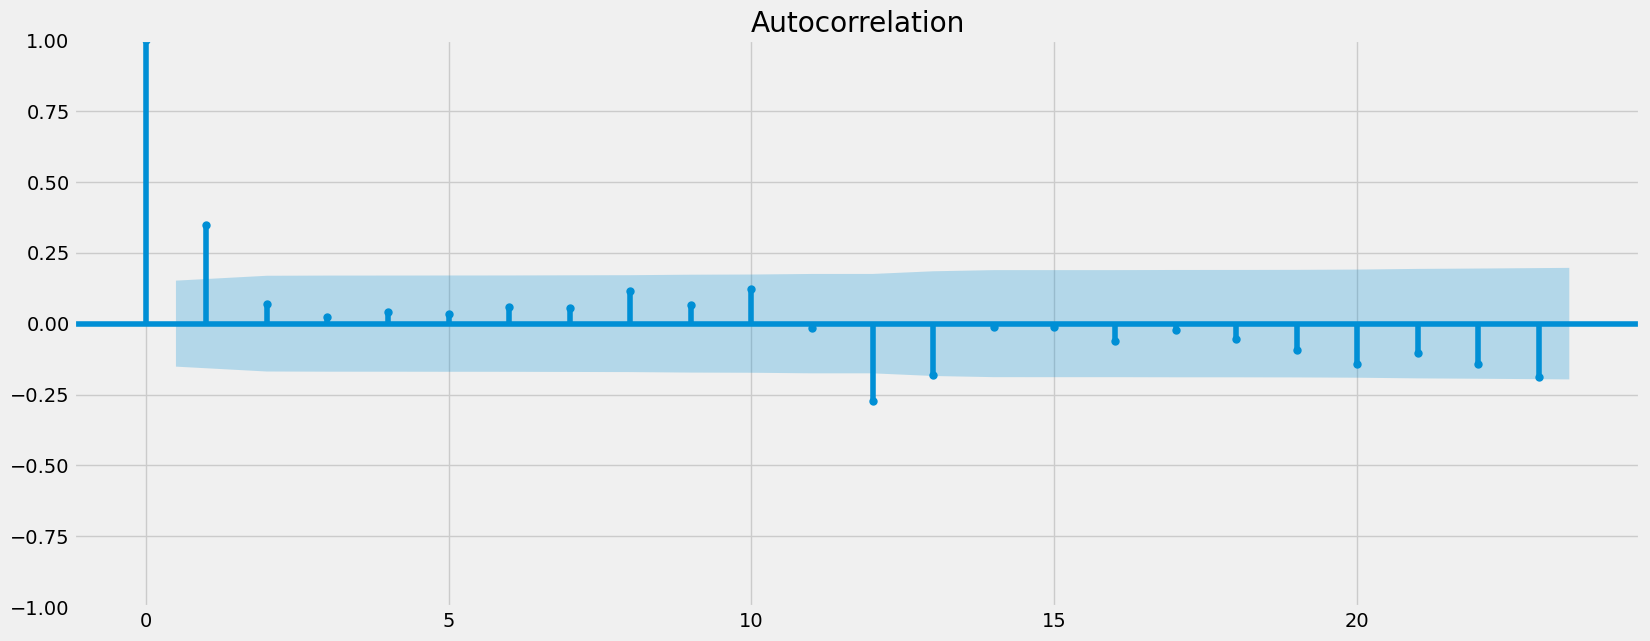

In [28]:
# Checking autocorrelation
plot_acf(df_diff)
plt.show()

There is no longer a considerable amount of lags, deeming this data stationary. 

# 10. Exporting Data Frame

In [29]:
df_cpi.to_csv(r'/Users/suzandiab/Documents/Cost of Living/02 Data/Prepared Data/df_final.csv')